In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv('games_details.csv')
seasons = pd.read_csv('games.csv')[["GAME_ID","SEASON"]]
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

In [4]:
df.drop(["GAME_ID","TEAM_ID","PLAYER_ID"],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FGM,523751.0,3.574498,3.019116,0.0,1.00,3.000,5.000,28.0
FGA,523751.0,7.878062,5.657840,0.0,3.00,7.000,11.000,50.0
FG_PCT,523751.0,0.415843,0.251636,0.0,0.25,0.429,0.571,1.0
FG3M,523751.0,0.753051,1.205652,0.0,0.00,0.000,1.000,14.0
FG3A,523751.0,2.115030,2.521680,0.0,0.00,1.000,3.000,24.0
FG3_PCT,523751.0,0.197427,0.289293,0.0,0.00,0.000,0.375,1.0
FTM,523751.0,1.738716,2.356272,0.0,0.00,1.000,3.000,26.0
FTA,523751.0,2.294722,2.892114,0.0,0.00,2.000,4.000,39.0
FT_PCT,523751.0,0.436454,0.427786,0.0,0.00,0.500,0.909,1.0
OREB,523751.0,1.028187,1.401890,0.0,0.00,1.000,2.000,18.0


In [5]:
df[df.duplicated(subset=["GAME_ID","PLAYER_ID"], keep="first")]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
23427,22000069,1610612763,MEM,Memphis,1628960,Grayson Allen,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23428,22000069,1610612763,MEM,Memphis,1629007,Jontay Porter,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23429,22000069,1610612763,MEM,Memphis,1630214,Xavier Tillman,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23430,22000069,1610612766,CHA,Charlotte,1630176,Vernon Carey Jr.,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23431,22000069,1610612766,CHA,Charlotte,1628370,Malik Monk,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40312,22000002,1610612747,LAL,Los Angeles,2544,LeBron James,NaN,F,NaN,28:21,...,2.0,3.0,5.0,5.0,0.0,0.0,4.0,2.0,22.0,2.0
40313,22000002,1610612747,LAL,Los Angeles,203484,Kentavious Caldwell-Pope,NaN,G,NaN,23:03,...,0.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,9.0,-9.0
40314,22000002,1610612747,LAL,Los Angeles,203471,Dennis Schroder,NaN,G,NaN,27:48,...,1.0,11.0,12.0,8.0,0.0,0.0,1.0,4.0,14.0,-10.0
40315,22000002,1610612747,LAL,Los Angeles,1628398,Kyle Kuzma,NaN,NaN,NaN,26:38,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,15.0,1.0


In [6]:
df.drop_duplicates(subset=["GAME_ID","PLAYER_ID"],keep="first",inplace=True)

In [7]:
df = df.groupby(["GAME_ID","TEAM_ID"]).sum()
df = df.reset_index()
df = df.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT','PLUS_MINUS'],axis=1)

df["FG_PCT"] = df["FGM"]/df["FGA"]*100
df["FG3_PCT"] = df["FG3M"]/df["FG3A"]*100
df["FT_PCT"] = df["FTM"]/df["FTA"]*100

In [8]:
print (f"There is still {df.isna().sum().sum()} null values.\n")
print ("There is a game with 3 unique rows.\n")

print(df["GAME_ID"].value_counts().sort_values().tail(5))

display(df[df["GAME_ID"] == 10500109])

#dropping the null row

df = df.drop(index=335,axis=0)
df = df.reset_index().drop("index",axis=1)

There is still 3 null values.

There is a game with 3 unique rows.

20701124    2
21100481    2
21200784    2
21000146    2
10500109    3
Name: GAME_ID, dtype: int64


,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT
334,10500109,1610612742,36.0,73.0,5.0,16.0,26.0,35.0,10.0,27.0,37.0,18.0,8.0,9.0,13.0,19.0,103.0,49.315068,31.250000,74.285714
335,10500109,1610612756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
336,10500109,1610612765,40.0,87.0,4.0,9.0,13.0,15.0,15.0,26.0,41.0,20.0,7.0,11.0,13.0,29.0,97.0,45.977011,44.444444,86.666667


In [9]:
df.loc[7002, "PTS"] = 90
df.loc[7623,"PTS"] = 103 

In [10]:
df = df.sort_values("GAME_ID")   #Sort the rows by GAME_ID, it is an extra check to avoid any bug in the next rows of the code
df["VICTORY"] = ""

for i in range(0,len(df)-1,2):
    if df["PTS"][i] > df["PTS"][i+1]:   # Check which of the two team has won and update the "VICTORY" column
        
        df.loc[i , "VICTORY"] = "Yes"
        df.loc[i+1 , "VICTORY"] = "No"
        
    elif df["PTS"][i] < df["PTS"][i+1]:
        
        df.loc[i , "VICTORY"] = "No"
        df.loc[i+1 , "VICTORY"] = "Yes"  
        
    else:                               # Check for eventual problematic rows
        print("Tie game?")
        print(df.iloc[i])
        print('\n')

Tie game?
GAME_ID      20400769
TEAM_ID    1610612738
FGM              29.0
FGA              64.0
FG3M              4.0
FG3A             11.0
FTM              26.0
FTA              34.0
OREB              9.0
DREB             33.0
REB              42.0
AST              17.0
STL              10.0
BLK               6.0
TO               22.0
PF               25.0
PTS              88.0
FG_PCT        45.3125
FG3_PCT     36.363636
FT_PCT      76.470588
VICTORY              
Name: 7134, dtype: object


Tie game?
GAME_ID      20401013
TEAM_ID    1610612755
FGM              39.0
FGA              83.0
FG3M              6.0
FG3A             18.0
FTM              19.0
FTA              21.0
OREB              5.0
DREB             33.0
REB              38.0
AST              22.0
STL               9.0
BLK               2.0
TO               12.0
PF               20.0
PTS             103.0
FG_PCT      46.987952
FG3_PCT     33.333333
FT_PCT       90.47619
VICTORY              
Name: 7622, dtype: object




In [11]:
df = pd.merge(df,seasons,how="left",on="GAME_ID")

In [12]:
df.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT,VICTORY,SEASON
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,...,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000,No,2003
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,...,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412,Yes,2003
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,...,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000,No,2003
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,...,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706,Yes,2003
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,...,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517,Yes,2003


In [13]:
df = df[df['SEASON']!=2021]

In [14]:
df[df['SEASON']==2004]['VICTORY'].value_counts()

No     1359
Yes    1359
          6
Name: VICTORY, dtype: int64

In [15]:
set(df[df['VICTORY'] == '']['GAME_ID'])

{20400769, 20401013, 20401079}

In [16]:
df = df[~df['GAME_ID'].isin([20400769, 20401013, 20401079])]

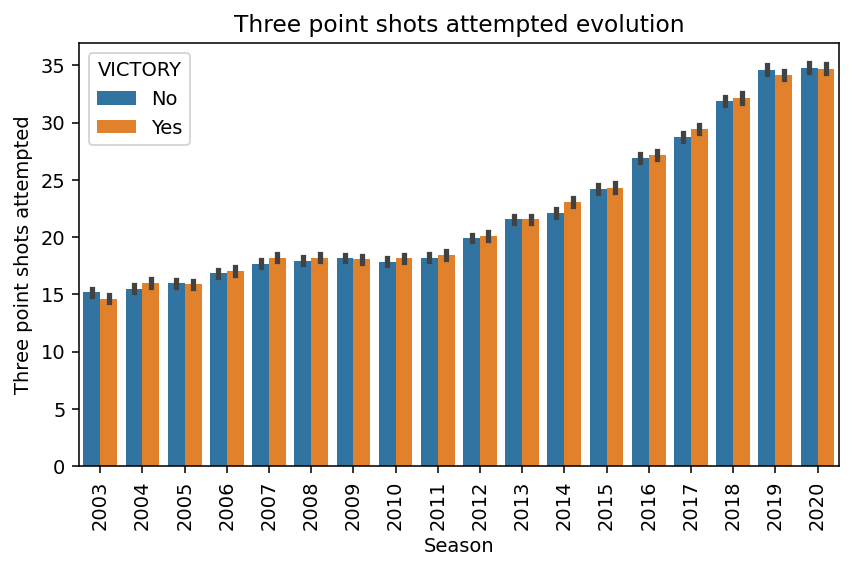

In [17]:
plt.figure(figsize=(7,4),dpi=140)
ax = sns.barplot(data=df,x="SEASON",y="FG3A",hue="VICTORY")

ax.set(ylabel="Three point shots attempted", xlabel="Season")
ax.set_title("Three point shots attempted evolution")

plt.xticks(rotation=90);

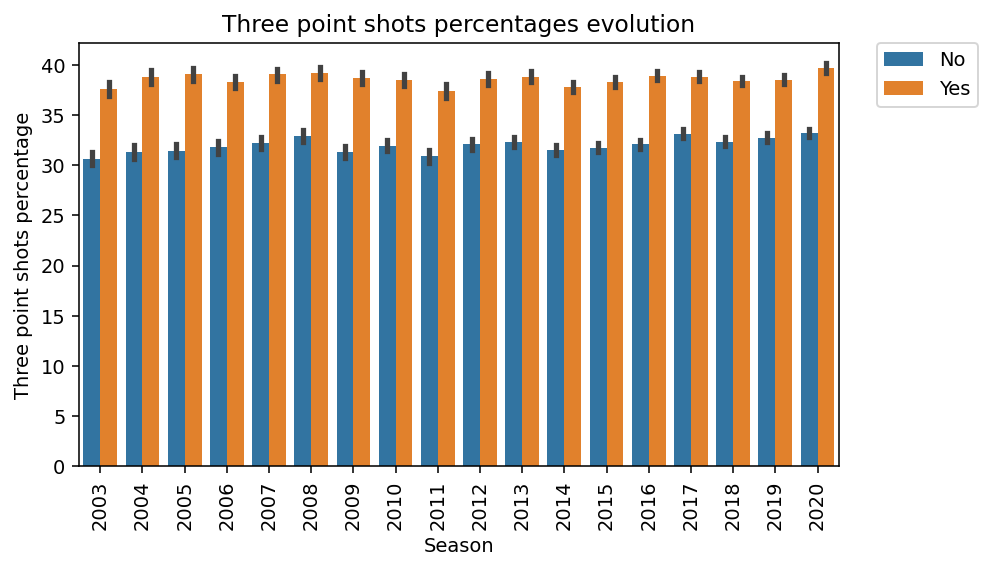

In [18]:
plt.figure(figsize=(7,4),dpi=140)
ax = sns.barplot(data=df,x="SEASON",y="FG3_PCT",hue="VICTORY")

ax.set(ylabel="Three point shots percentage", xlabel="Season")
ax.set_title("Three point shots percentages evolution")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.xticks(rotation=90);

In [19]:
df.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT,VICTORY,SEASON
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,...,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000,No,2003
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,...,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412,Yes,2003
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,...,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000,No,2003
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,...,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706,Yes,2003
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,...,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517,Yes,2003


In [20]:
# Divide the data in three parts

first_split = df[df["SEASON"] < 2007]
second_split = df[(df["SEASON"] >= 2007) & (df["SEASON"] < 2016)]
third_split = df[df["SEASON"] >= 2016]

In [21]:
X1 = first_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y1 = first_split["VICTORY"]

X2 = second_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y2 = second_split["VICTORY"]

X3 = third_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y3 = third_split["VICTORY"]

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=27)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=27)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=27)

In [24]:
# ML model for the first chunk of data (2003-2007)
#Train
model_first_split = RandomForestClassifier(bootstrap=True)
model_first_split.fit(X1_train,y1_train)

#Predict
y1_pred = model_first_split.predict(X1_test)


# ML model for the second chunk of data (2012-2016)
#Train
model_second_split = RandomForestClassifier(bootstrap=True)
model_second_split.fit(X2_train,y2_train)

#Predict
y2_pred = model_second_split.predict(X2_test)


# ML model for the third chunk of data (2016-2020)
#Train
model_third_split = RandomForestClassifier(bootstrap=True)
model_third_split.fit(X3_train,y3_train)

#Predict
y3_pred = model_third_split.predict(X3_test)

In [25]:
print("These are the results for the first model (2003-2006)\n")
print(classification_report(y1_test,y1_pred))
print('\n')

print("These are the results for the second model (2007-2015)\n")
print(classification_report(y2_test,y2_pred))
print('\n')

print("These are the results for the first model (2016-2020)\n")
print(classification_report(y3_test,y3_pred))
print('\n')

These are the results for the first model (2003-2006)

              precision    recall  f1-score   support

          No       0.79      0.80      0.80      1646
         Yes       0.80      0.79      0.79      1652

    accuracy                           0.80      3298
   macro avg       0.80      0.80      0.80      3298
weighted avg       0.80      0.80      0.80      3298



These are the results for the second model (2007-2015)

              precision    recall  f1-score   support

          No       0.80      0.82      0.81      3758
         Yes       0.81      0.80      0.80      3723

    accuracy                           0.81      7481
   macro avg       0.81      0.81      0.81      7481
weighted avg       0.81      0.81      0.81      7481



These are the results for the first model (2016-2020)

              precision    recall  f1-score   support

          No       0.80      0.82      0.81      1999
         Yes       0.82      0.80      0.81      2003

    accuracy

In [26]:
def Single_column_variation(df = None, column = None, min_value = 0, max_value = 40):
    """This function takes in input a dataframe df and duplicate in a list of dataframe. 
    The new dataframes are built from one row of the original dataframe.
    All the column are fixed, and the column selected range from 0 to max_value."""
    
    df_list = list()

    for i in range(len(df)-1):
        
        df_list.append(pd.DataFrame(df.iloc[i]).transpose())           
        
        df_list[i] = pd.DataFrame(np.repeat(df_list[i].values,
                                  max_value-min_value, axis=0), columns=df_list[i].columns)  # Duplicate each row in a new dataframe
    
     
        for k in range(min_value,max_value):
            df_list[i][column][k] = k    # modify the value of the selected column 

    return df_list

In [27]:
def Best_stats(df, model=None):
    """This function predict the statistics that maximize the probability of winning"""
    
    results = list()
    max_prob = list()

    for i in range(len(df)-1):
        
        results.append(model.predict_proba(df[i])[:,1])  #Predict the probability to win for each value of the selected varying column
        max_prob.append(results[i].argmax())   # Estimate the best stats
        
    return results, max_prob

In [28]:
first_split_list = Single_column_variation(X1_test,"FG3A",0,60)
results_first_split, max_prob_first_split = Best_stats(first_split_list, model_first_split)

second_split_list = Single_column_variation(X2_test,"FG3A",0,60)
results_second_split, max_prob_second_split = Best_stats(second_split_list, model_second_split)

third_split_list = Single_column_variation(X3_test,"FG3A",0,60)
results_third_split, max_prob_third_split = Best_stats(third_split_list, model_third_split)

In [29]:
average1 = np.sum(results_first_split,axis=0)/len(results_first_split)
average2 = np.sum(results_second_split,axis=0)/len(results_second_split)
average3 = np.sum(results_third_split,axis=0)/len(results_third_split)

Text(0.5, 1.0, 'Partial Dependence Plot')

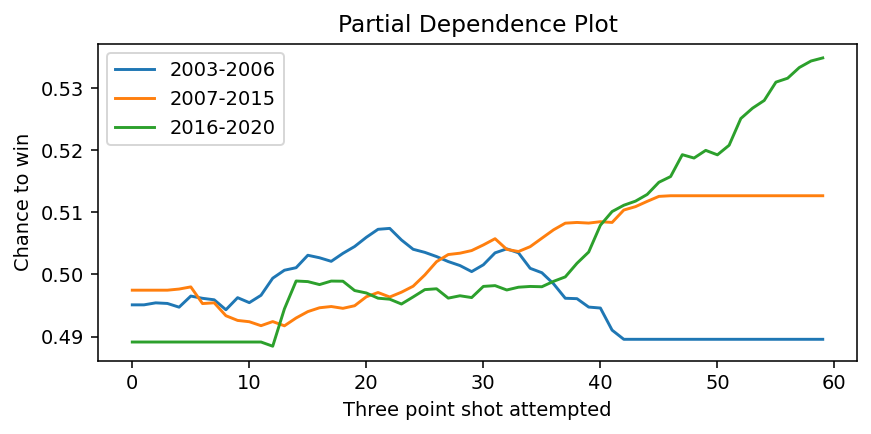

In [30]:
plt.figure(figsize=(7,3),dpi=140)

plt.plot(range(60),average1)
plt.plot(range(60),average2)
plt.plot(range(60),average3)

plt.legend(["2003-2006","2007-2015","2016-2020"])
plt.xlabel("Three point shot attempted")
plt.ylabel("Chance to win") 
plt.title("Partial Dependence Plot")

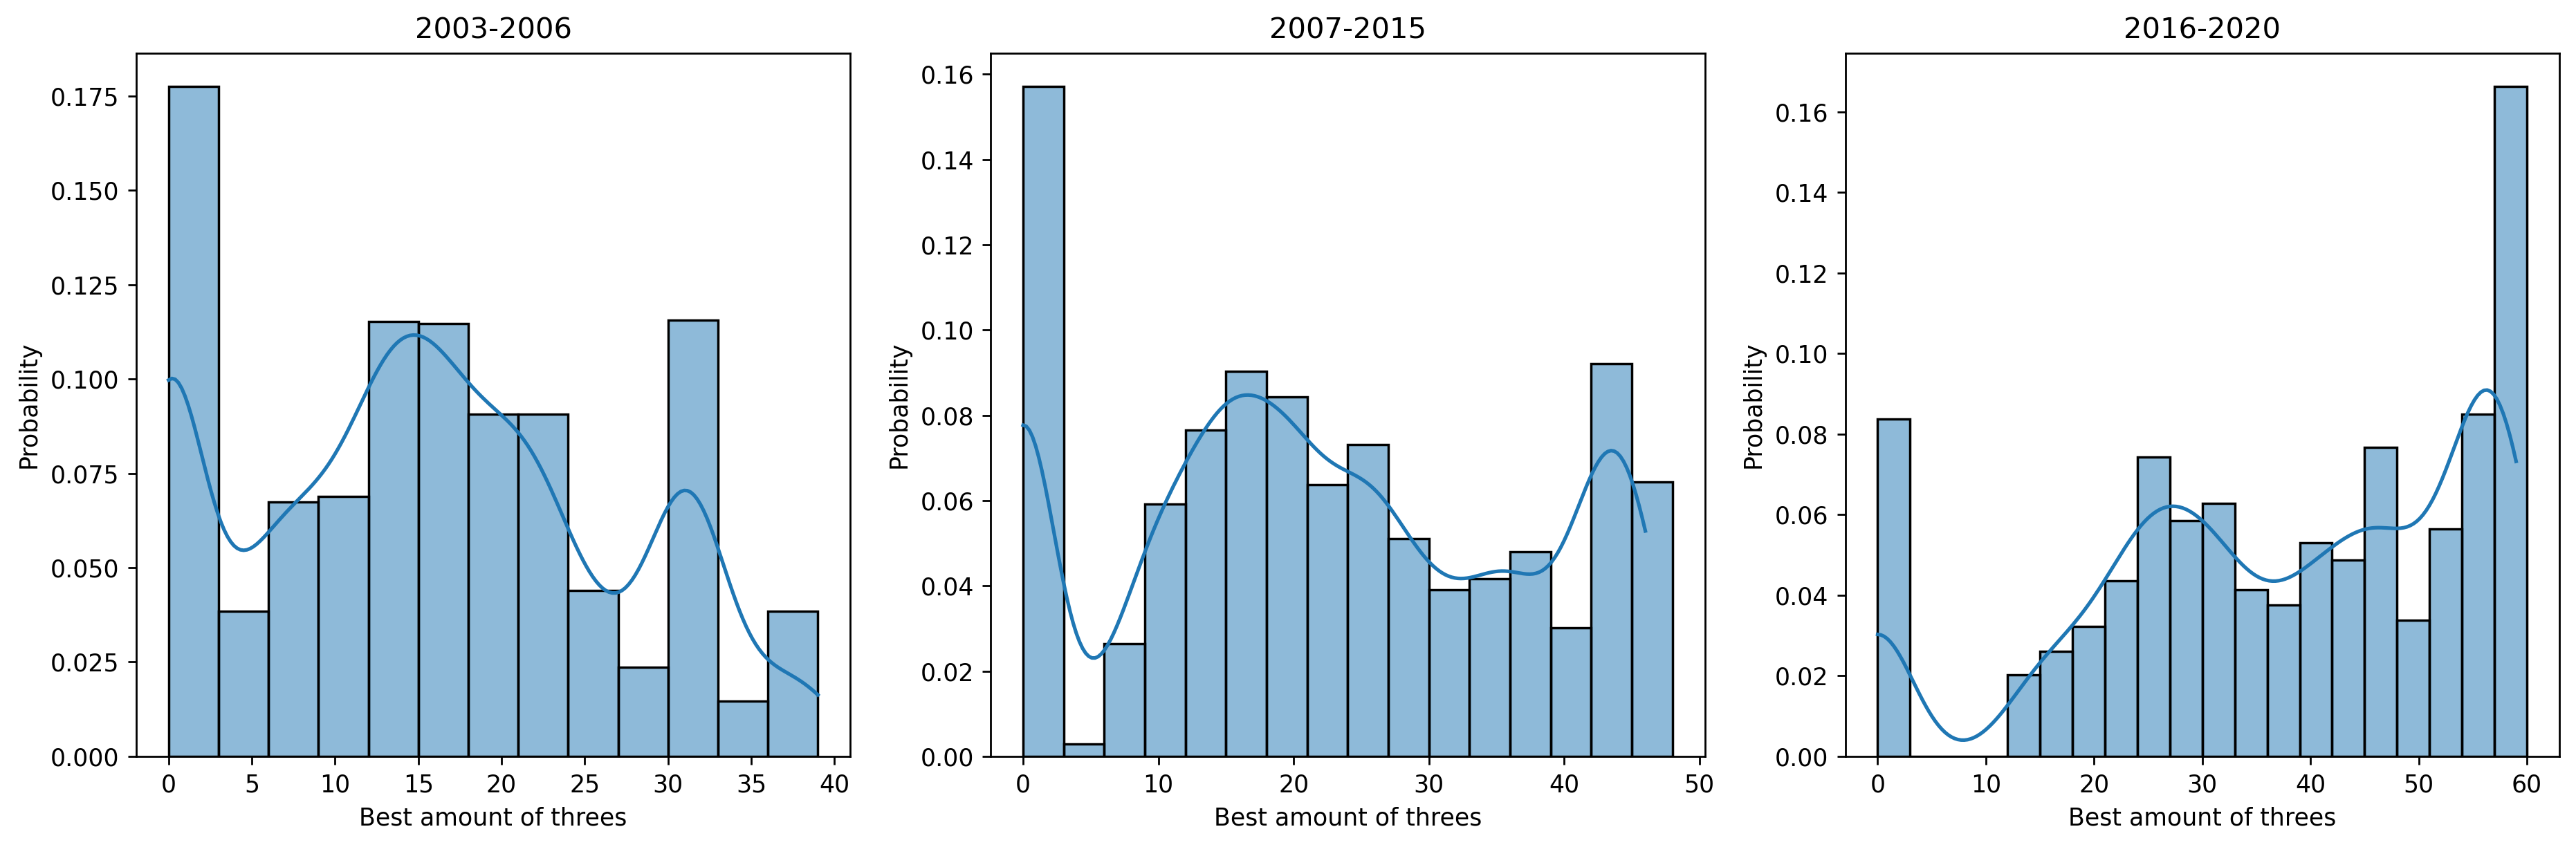

In [31]:
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=250)

sns.histplot(ax = ax[0], x = max_prob_first_split, kde=True, stat="probability", binwidth=3)
ax[0].set(xlabel="Best amount of threes", title="2003-2006")

sns.histplot(ax = ax[1], x = max_prob_second_split, kde=True, stat="probability", binwidth=3)
ax[1].set(xlabel="Best amount of threes", title="2007-2015")

sns.histplot(ax = ax[2], x = max_prob_third_split, kde=True, stat="probability", binwidth=3)
ax[2].set(xlabel="Best amount of threes", title="2016-2020")

plt.tight_layout()

In [32]:
old_school_pred = model_third_split.predict_proba(X1)
new_school_pred = model_first_split.predict_proba(X3)

lose_mean_old = old_school_pred.mean(axis=0)[0]
win_mean_old = old_school_pred.mean(axis=0)[1]
lose_mean_new = new_school_pred.mean(axis=0)[0]
win_mean_new = new_school_pred.mean(axis=0)[1]

print("Old style team playing in the modern NBA win rate  =", win_mean_old,
     "\nNew style team playin in the past NBA win rate =", win_mean_new)

Old style team playing in the modern NBA win rate  = 0.3760252911208148 
New style team playin in the past NBA win rate = 0.6185562218890556


# NOW IMPORTING THE PROCESSED DATASET CONTIANING HOME AND AWAY TEAM NAME REFERENCE

In [33]:
df = pd.read_csv('new_games_details.csv')
df = df.drop('TEAM_ID',axis=1)
df = df[df['YEAR']!=2021]
df.head()

,GAME_ID,HOME_TEAM_NAME,YEAR,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,...,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TO_AWAY,PF_AWAY,PTS_AWAY,HOME_TEAM_WIN
0,10300001,Utah Jazz,2003,32,70,0.457,1,7,0.143,25,...,12,26,38,20,9,4,18,34,85,1
1,10300002,Memphis Grizzlies,2003,40,81,0.494,4,15,0.267,21,...,11,32,43,20,9,4,24,26,94,1
2,10300003,Detroit Pistons,2003,34,87,0.391,4,9,0.444,24,...,12,40,52,25,10,7,25,33,100,0
3,10300004,Dallas Mavericks,2003,40,82,0.488,1,6,0.167,18,...,6,23,29,14,9,5,19,24,76,1
4,10300005,Portland Trail Blazers,2003,38,70,0.543,3,7,0.429,23,...,12,22,34,10,9,2,29,25,78,1


**Boxplot of points scored by each team**

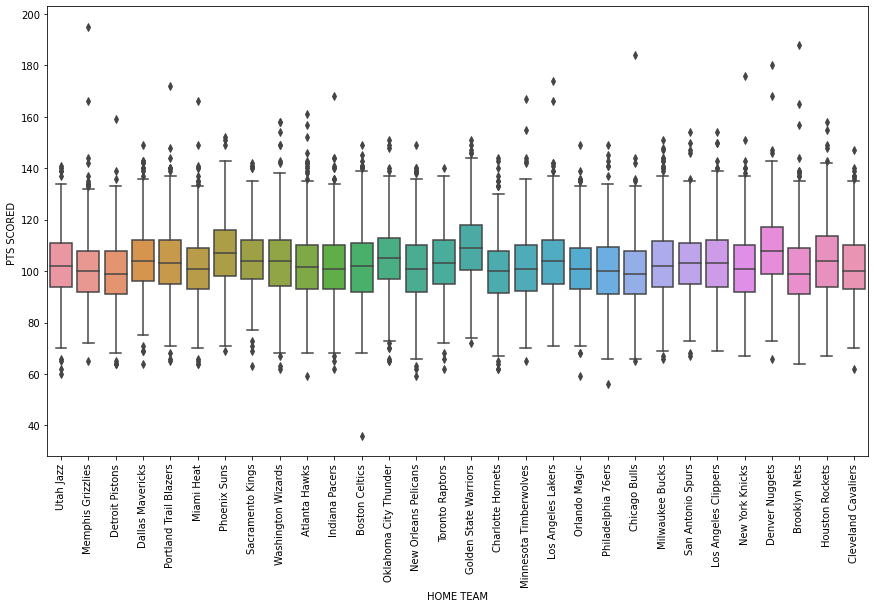

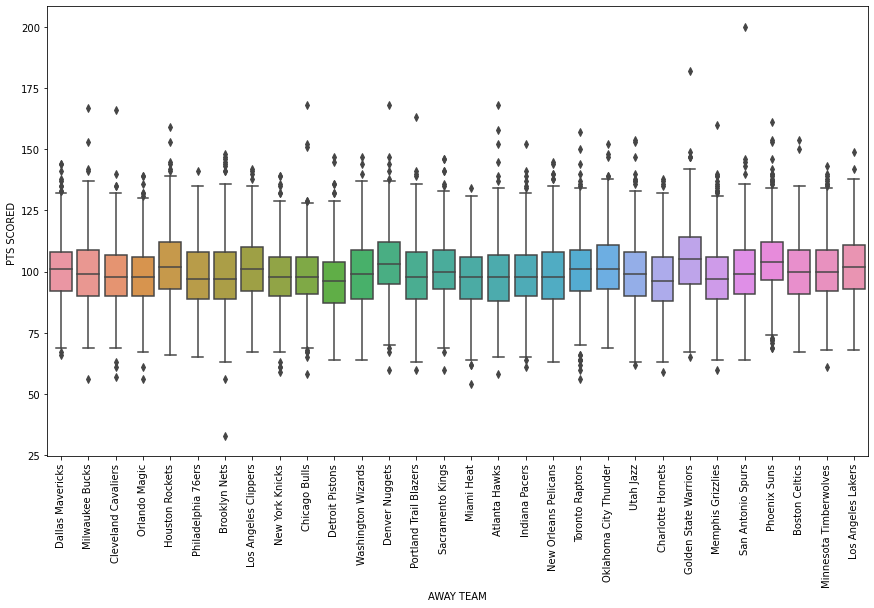

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="HOME_TEAM_NAME",y="PTS_HOME",data=df)
plt.xlabel("HOME TEAM")
plt.xticks(rotation = 90)
plt.ylabel("PTS SCORED ")
plt.show()

print('\n\n')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="AWAY_TEAM_NAME",y="PTS_AWAY",data=df)
plt.xlabel("AWAY TEAM")
plt.xticks(rotation = 90)
plt.ylabel("PTS SCORED ")
plt.show()

**Boxplot of number of assist scored by each team**

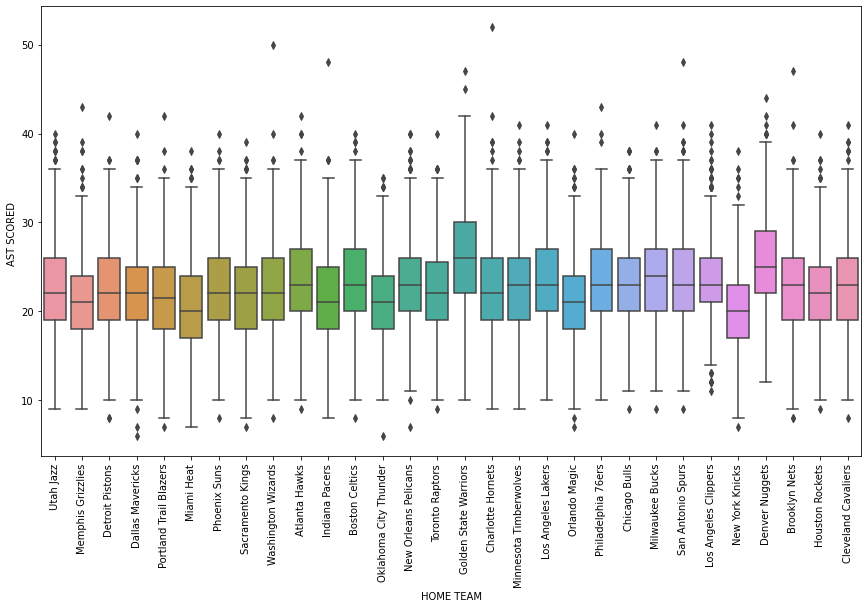

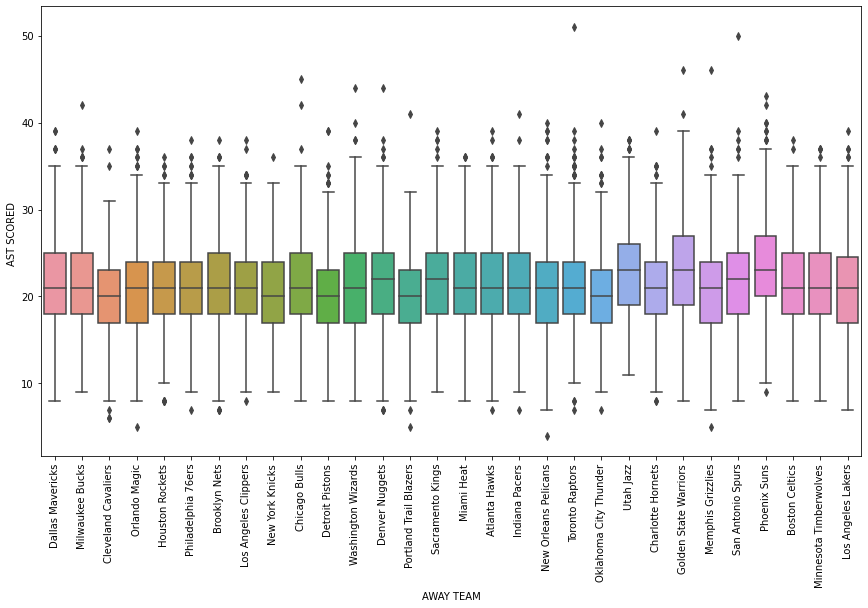

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="HOME_TEAM_NAME",y="AST_HOME",data=df)
plt.xlabel("HOME TEAM")
plt.xticks(rotation = 90)
plt.ylabel("AST SCORED ")
plt.show()

print('\n\n')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="AWAY_TEAM_NAME",y="AST_AWAY",data=df)
plt.xlabel("AWAY TEAM")
plt.xticks(rotation = 90)
plt.ylabel("AST SCORED ")
plt.show()

**Boxplot of number of rebounds taken by each team**

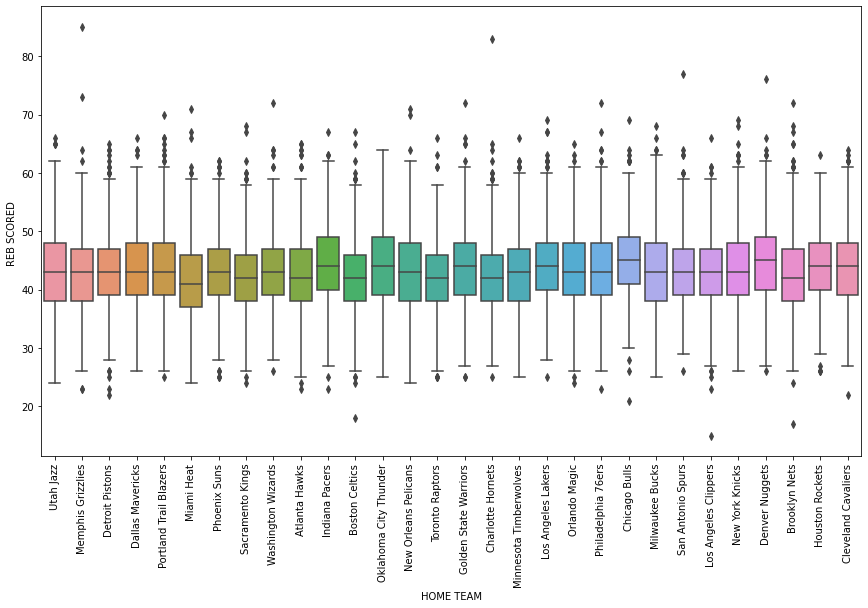

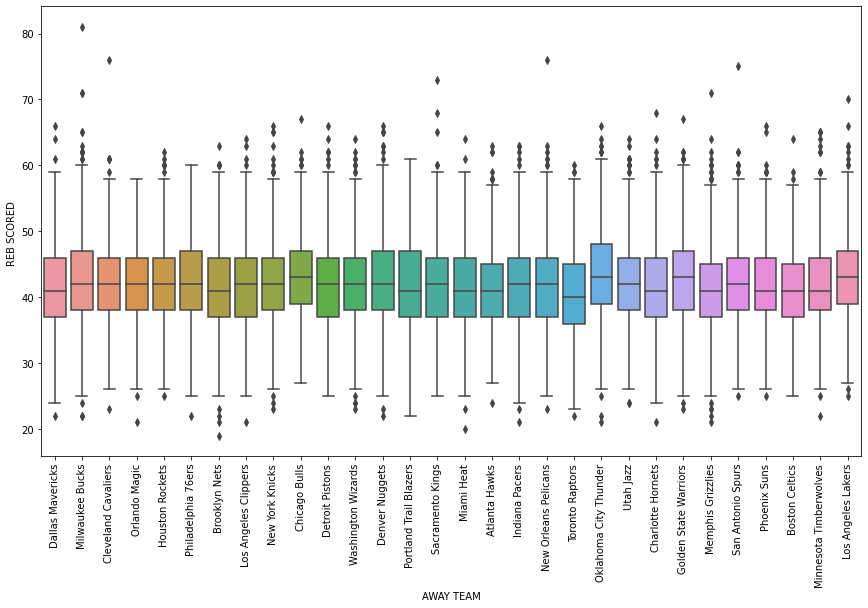

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="HOME_TEAM_NAME",y="REB_HOME",data=df)
plt.xlabel("HOME TEAM")
plt.xticks(rotation = 90)
plt.ylabel("REB SCORED ")
plt.show()

print('\n\n')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
sns.boxplot(x="AWAY_TEAM_NAME",y="REB_AWAY",data=df)
plt.xlabel("AWAY TEAM")
plt.xticks(rotation = 90)
plt.ylabel("REB SCORED ")
plt.show()

**Here we are going to plot the relationship between HOME_TEAM_WINS and PTS,AST and REB scored by each team**

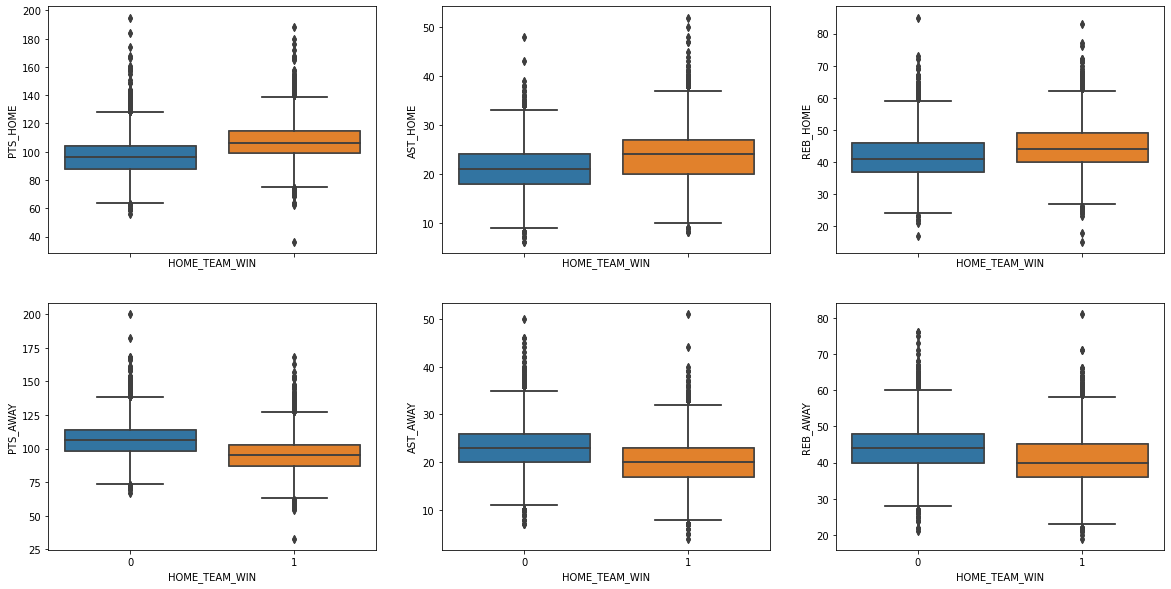

In [37]:
# sns.set(style="darkgrid")

plot_list=["PTS_HOME","AST_HOME","REB_HOME","PTS_AWAY","AST_AWAY","REB_AWAY"]

fig, axes =plt.subplots(2,3, figsize=(20,10),sharex=True)

for j in range(2):
    for i,ax in enumerate(axes.flat):
        
        sns.boxplot(x='HOME_TEAM_WIN',y=plot_list[i], data=df, ax=ax)

In [38]:
df2 = df.copy()
df2 = df2.drop(['YEAR','GAME_ID','HOME_TEAM_NAME', 'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3M_HOME',
       'FG3A_HOME', 'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME',
       'OREB_HOME', 'DREB_HOME',  'PTS_HOME', 'AWAY_TEAM_NAME',
       'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY', 'FG3M_AWAY', 'FG3A_AWAY',
       'FG3_PCT_AWAY', 'FTM_AWAY', 'FTA_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY',
       'DREB_AWAY', 'PTS_AWAY', 'HOME_TEAM_WIN'],axis=1)

In [39]:
df2.columns

Index(['REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TO_HOME', 'PF_HOME',
       'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TO_AWAY', 'PF_AWAY'],
      dtype='object')

In [40]:
for i in df2.select_dtypes(['int64','float64']):
    print(i)

REB_HOME
AST_HOME
STL_HOME
BLK_HOME
TO_HOME
PF_HOME
REB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TO_AWAY
PF_AWAY


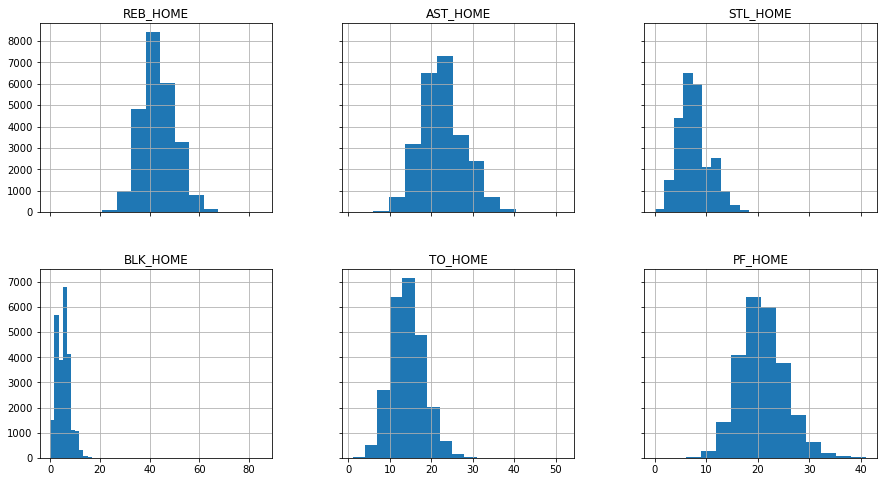

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(15,8), sharex='col', sharey='row')

m=0
for i in range(2):
    for j in range(3):
        df.hist(column = df2.columns[m], bins = 12, ax=ax[i,j])
        m+=1

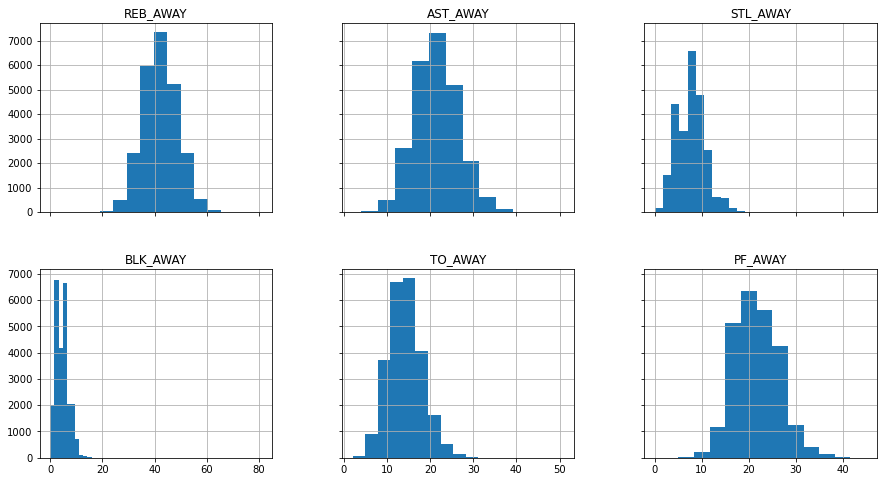

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(15,8), sharex='col', sharey='row')

m=6
for i in range(2):
    for j in range(3):
        df.hist(column = df2.columns[m], bins = 12, ax=ax[i,j])
        m+=1

# MODELLING

In [43]:
df3 = pd.read_csv('NBA_DATASET.csv')
df3 = df3.drop('PTS_DIFF',axis=1)
df3.head()

,HOME_TEAM_NAME,AWAY_TEAM_NAME,YEAR,FG_PCT_DIFF,FG3_PCT_DIFF,FT_PCT_DIFF,REB_DIFF,AST_DIFF,STL_DIFF,BLK_DIFF,TO_DIFF,PF_DIFF,HOME_TEAM_WIN
0,Atlanta Hawks,Boston Celtics,2003,0.077,0.052,-0.11,16,4,-3,2,7,-1,1
1,Atlanta Hawks,Boston Celtics,2003,0.008,-0.027,0.35,8,3,0,-3,-2,6,1
2,Atlanta Hawks,Boston Celtics,2004,-0.076,0.246,0.05,0,-11,2,-7,-4,-9,1
3,Atlanta Hawks,Boston Celtics,2004,-0.183,-0.164,0.07,5,-10,2,-8,0,0,0
4,Atlanta Hawks,Boston Celtics,2005,0.008,0.171,-0.01,13,1,-2,-2,1,-7,1


In [44]:
df3 = df3.groupby(['HOME_TEAM_NAME', 'AWAY_TEAM_NAME'])['FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF', 'REB_DIFF', 'AST_DIFF', 'STL_DIFF','BLK_DIFF', 'TO_DIFF', 'PF_DIFF', 'HOME_TEAM_WIN'].mean()

In [45]:
#df3.to_csv("grouped1.csv")

In [46]:
df2 = pd.read_csv('grouped1.csv')
df2.head()

,HOME_TEAM_NAME,AWAY_TEAM_NAME,FG_PCT_DIFF,FG3_PCT_DIFF,FT_PCT_DIFF,REB_DIFF,AST_DIFF,STL_DIFF,BLK_DIFF,TO_DIFF,PF_DIFF,HOME_TEAM_WIN
0,Atlanta Hawks,Boston Celtics,0.006146,0.018780,0.004878,2.439024,0.219512,-0.951220,0.195122,1.000000,-1.292683,0.609756
1,Atlanta Hawks,Brooklyn Nets,0.019400,-0.030600,-0.002286,1.314286,1.885714,0.857143,0.628571,-0.600000,-1.057143,0.571429
2,Atlanta Hawks,Charlotte Hornets,0.040923,0.016256,0.028718,2.025641,2.974359,-0.128205,0.487179,1.025641,0.461538,0.717949
3,Atlanta Hawks,Chicago Bulls,0.001917,0.004750,-0.001944,-0.472222,0.194444,0.500000,0.916667,0.277778,0.194444,0.500000
4,Atlanta Hawks,Cleveland Cavaliers,0.011579,-0.037921,0.031579,-3.684211,1.210526,-0.105263,0.368421,-0.657895,0.526316,0.421053


In [47]:
X = df2.drop(['HOME_TEAM_NAME','AWAY_TEAM_NAME','HOME_TEAM_WIN'],axis=1)
y = df2.HOME_TEAM_WIN

In [48]:
import statsmodels.api as sm

In [49]:
x = sm.add_constant(X)

In [50]:
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          HOME_TEAM_WIN   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     261.7
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          2.57e-239
Time:                        21:36:25   Log-Likelihood:                 1114.5
No. Observations:                 870   AIC:                            -2209.
Df Residuals:                     860   BIC:                            -2161.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4983      0.003    147.870   

***From the above Stats summary we can clearly observe that AST_DIFF and STL_DIFF has p-value > 0.05, so we will drop them***

In [51]:
X1 = X.drop(['AST_DIFF','STL_DIFF'],axis=1)
y = df2.HOME_TEAM_WIN

In [52]:
x = sm.add_constant(X1)

In [53]:
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          HOME_TEAM_WIN   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     334.7
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          8.39e-241
Time:                        21:36:25   Log-Likelihood:                 1112.0
No. Observations:                 870   AIC:                            -2208.
Df Residuals:                     862   BIC:                            -2170.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4995      0.003    157.111   

In [54]:
df2 = pd.read_csv('grouped1.csv')
df2 = df2.drop(["AST_DIFF",'STL_DIFF'],axis=1)
df2.head()

,HOME_TEAM_NAME,AWAY_TEAM_NAME,FG_PCT_DIFF,FG3_PCT_DIFF,FT_PCT_DIFF,REB_DIFF,BLK_DIFF,TO_DIFF,PF_DIFF,HOME_TEAM_WIN
0,Atlanta Hawks,Boston Celtics,0.006146,0.018780,0.004878,2.439024,0.195122,1.000000,-1.292683,0.609756
1,Atlanta Hawks,Brooklyn Nets,0.019400,-0.030600,-0.002286,1.314286,0.628571,-0.600000,-1.057143,0.571429
2,Atlanta Hawks,Charlotte Hornets,0.040923,0.016256,0.028718,2.025641,0.487179,1.025641,0.461538,0.717949
3,Atlanta Hawks,Chicago Bulls,0.001917,0.004750,-0.001944,-0.472222,0.916667,0.277778,0.194444,0.500000
4,Atlanta Hawks,Cleveland Cavaliers,0.011579,-0.037921,0.031579,-3.684211,0.368421,-0.657895,0.526316,0.421053


**Checking the Correlation Matrix for all the features**

<AxesSubplot:>

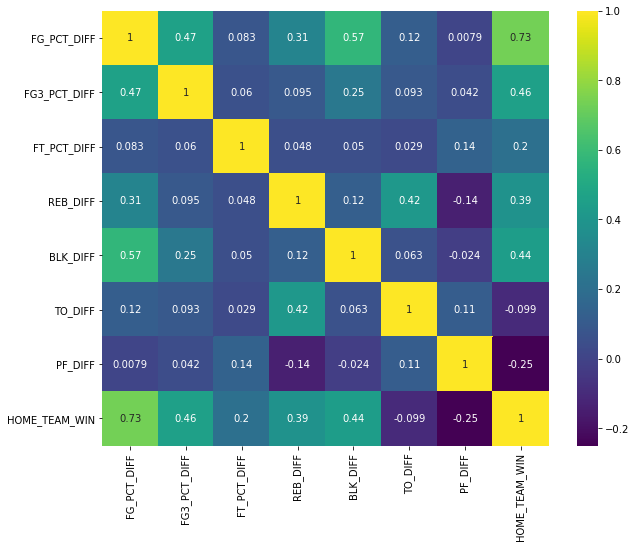

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True, cmap='viridis')

**DUMMYFYING HOME AND AWAY TEAM NAMES**

In [56]:
df2 = pd.get_dummies(df2,drop_first=True)

In [57]:
df2.head()

,FG_PCT_DIFF,FG3_PCT_DIFF,FT_PCT_DIFF,REB_DIFF,BLK_DIFF,TO_DIFF,PF_DIFF,HOME_TEAM_WIN,HOME_TEAM_NAME_Boston Celtics,HOME_TEAM_NAME_Brooklyn Nets,...,AWAY_TEAM_NAME_Oklahoma City Thunder,AWAY_TEAM_NAME_Orlando Magic,AWAY_TEAM_NAME_Philadelphia 76ers,AWAY_TEAM_NAME_Phoenix Suns,AWAY_TEAM_NAME_Portland Trail Blazers,AWAY_TEAM_NAME_Sacramento Kings,AWAY_TEAM_NAME_San Antonio Spurs,AWAY_TEAM_NAME_Toronto Raptors,AWAY_TEAM_NAME_Utah Jazz,AWAY_TEAM_NAME_Washington Wizards
0,0.006146,0.018780,0.004878,2.439024,0.195122,1.000000,-1.292683,0.609756,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.019400,-0.030600,-0.002286,1.314286,0.628571,-0.600000,-1.057143,0.571429,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.040923,0.016256,0.028718,2.025641,0.487179,1.025641,0.461538,0.717949,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001917,0.004750,-0.001944,-0.472222,0.916667,0.277778,0.194444,0.500000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.011579,-0.037921,0.031579,-3.684211,0.368421,-0.657895,0.526316,0.421053,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = df2.drop('HOME_TEAM_WIN',axis=1)
y = df2.HOME_TEAM_WIN

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
X_train.shape , X_test.shape

((609, 65), (261, 65))

In [62]:
X_train.head()

,FG_PCT_DIFF,FG3_PCT_DIFF,FT_PCT_DIFF,REB_DIFF,BLK_DIFF,TO_DIFF,PF_DIFF,HOME_TEAM_NAME_Boston Celtics,HOME_TEAM_NAME_Brooklyn Nets,HOME_TEAM_NAME_Charlotte Hornets,...,AWAY_TEAM_NAME_Oklahoma City Thunder,AWAY_TEAM_NAME_Orlando Magic,AWAY_TEAM_NAME_Philadelphia 76ers,AWAY_TEAM_NAME_Phoenix Suns,AWAY_TEAM_NAME_Portland Trail Blazers,AWAY_TEAM_NAME_Sacramento Kings,AWAY_TEAM_NAME_San Antonio Spurs,AWAY_TEAM_NAME_Toronto Raptors,AWAY_TEAM_NAME_Utah Jazz,AWAY_TEAM_NAME_Washington Wizards
69,0.018235,0.044765,0.021765,0.352941,-0.411765,-0.882353,-0.941176,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131,0.001204,0.014388,0.022245,4.244898,0.102041,1.163265,-0.469388,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0.024909,0.000303,-0.040000,3.545455,1.090909,0.454545,-0.878788,0,0,0,...,0,0,0,0,0,1,0,0,0,0
449,0.027909,0.015909,0.006364,-0.318182,1.363636,-0.318182,-0.045455,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,-0.018105,0.009211,-0.038421,0.052632,-1.157895,-2.526316,-0.421053,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# LINEAR REGRESSION

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
lr_score = r2_score(y_test,y_pred)

In [68]:
lr_score

0.769558423117405

In [69]:
resid = y_test - y_pred

Text(0, 0.5, 'Residuals')

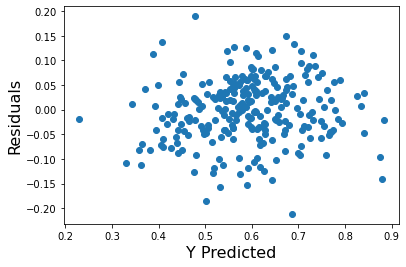

In [70]:
plt.scatter(x=y_pred, y=resid)
plt.xlabel("Y Predicted", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)

# DECISION TREE REGRESSOR

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [72]:
r2 = []
# max_depth = []

for i in range(1,21):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    
    r2.append(r2_score(y_test,y_pred))

In [73]:
dff = pd.DataFrame(index = range(1,len(r2)+1) , data = r2,columns=['R2 Score'])

In [74]:
dff.sort_values(ascending=False , by = 'R2 Score').head()

,R2 Score
5,0.544485
6,0.527316
7,0.520044
4,0.510642
8,0.510182


In [75]:
r2.index(max(r2))+1

5

In [76]:
dtree = DecisionTreeRegressor(max_depth=r2.index(max(r2))+1)

In [77]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [78]:
y_pred = dtree.predict(X_test)

In [79]:
dr_score = r2_score(y_test,y_pred)

In [80]:
dr_score

0.520650366291026

# KNN REGRESSOR

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [84]:
knr = KNeighborsRegressor()

In [85]:
r2 = []

for i in range(1,30):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(scaled_X_train,y_train)
    y_pred = knr.predict(scaled_X_test)
    r2.append(r2_score(y_test,y_pred))

In [86]:
dff = pd.DataFrame(index = range(1,len(r2)+1) , data = r2,columns=['R2 Score'])

In [87]:
dff.sort_values('R2 Score', ascending=False).head(2)

,R2 Score
9,0.431141
7,0.427426


In [88]:
knr = KNeighborsRegressor(n_neighbors=r2.index(max(r2))+1)

In [89]:
knr.fit(scaled_X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [90]:
y_pred = knr.predict(scaled_X_test)

In [91]:
knr_score = r2_score(y_test,y_pred)

In [92]:
knr_score

0.4311414999355593

# LOGISTIC REGRESSION

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lrr = LinearRegression()

In [95]:
lrr.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred = lrr.predict(X_test)

In [97]:
lrr_score = r2_score(y_test,y_pred)

In [98]:
lrr_score

0.769558423117405

# RANDOM FOREST REGRESSOR

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [100]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [101]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [102]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [103]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [104]:
rfr = RandomForestRegressor(**rf_random.best_params_)

In [105]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [106]:
y_pred = rfr.predict(X_test)

In [107]:
rfr = r2_score(y_test,y_pred)

In [108]:
rfr

0.6491172386683732

# SVR

In [109]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [110]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [111]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

In [112]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [114]:
svr = SVR(**grid.best_params_)

In [115]:
svr.fit(X_train,y_train)

SVR(C=1000, gamma=0.001)

In [116]:
y_pred = svr.predict(X_test)

In [117]:
svr = r2_score(y_test,y_pred)

In [118]:
svr

0.6195058440978848

# MODEL COMPARISON

In [119]:
scores = {'Linear Reg' : lr_score,
         'Decision Tree' : dr_score,
         'Knn Regression' : knr_score,
         'Logistic Regression' : lrr_score,
         'Random Forest Regression' : rfr,
         'Support Vector Regression' : svr}

In [120]:
pd.DataFrame(index=scores.keys(), data = scores.values(), columns=['R2 Scores']).sort_values('R2 Scores', ascending= False)

,R2 Scores
Linear Reg,0.769558
Logistic Regression,0.769558
Random Forest Regression,0.649117
Support Vector Regression,0.619506
Decision Tree,0.520650
Knn Regression,0.431141
